In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
w_sales = pd.read_csv(r"C:\Users\hongw\Downloads\1577429980_walmart_store_sales\Walmart_Store_sales.csv")

In [4]:
w_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
print(w_sales.size)
print(w_sales.shape)

51480
(6435, 8)


In [6]:
w_sales['Date']=pd.to_datetime(w_sales['Date'])

In [7]:
w_sales.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [8]:
w_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
w_sales['Sales Month'] = w_sales['Date'].dt.strftime('%Y-%m')
w_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05


In [10]:
df_sales_store = pd.DataFrame(w_sales, columns = ['Store','Weekly_Sales'])

In [11]:
df_sales_store.head()

,Store,Weekly_Sales
0,1,1643690.90
1,1,1641957.44
2,1,1611968.17
3,1,1409727.59
4,1,1554806.68


In [12]:
w_sales_groupby_store = df_sales_store.groupby('Store').sum()
w_sales_groupby_store.head()

,Weekly_Sales
Store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07


In [13]:
# Which Store has Maximum sales
w_sales_groupby_store.sort_values(by=['Weekly_Sales']).head()

,Weekly_Sales
Store,
33,37160221.96
44,43293087.84
5,45475688.90
36,53412214.97
38,55159626.42


In [14]:
w_sales_std_groupby_store = df_sales_store.groupby('Store').std()
w_sales_std_groupby_store.head()

,Weekly_Sales
Store,
1,155980.767761
2,237683.694682
3,46319.631557
4,266201.442297
5,37737.965745


In [15]:
#max Standard Deviation Store 
w_sales_std_groupby_store.sort_values(by=['Weekly_Sales']).head()

,Weekly_Sales
Store,
37,21837.461190
30,22809.665590
33,24132.927322
44,24762.832015
5,37737.965745


In [16]:
#define function to calculate cv
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100 

In [17]:
#coefficient of mean
w_sales_std_groupby_store.apply(cv)

Weekly_Sales    57.313207
dtype: float64

In [18]:
w_sales['Sales Quarter'] = w_sales['Date'].dt.to_period('Q')
w_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales Month,Sales Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05,2010Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12,2010Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02,2010Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05,2010Q2


In [19]:
df_quarterly_sales_store = pd.DataFrame(w_sales, columns = ['Store','Sales Quarter','Weekly_Sales'])
df_quarterly_sales_store.head()

,Store,Sales Quarter,Weekly_Sales
0,1,2010Q2,1643690.90
1,1,2010Q4,1641957.44
2,1,2010Q1,1611968.17
3,1,2010Q1,1409727.59
4,1,2010Q2,1554806.68


In [20]:
df_quarterly_sales_store_sum  = df_quarterly_sales_store.groupby(['Store','Sales Quarter'], as_index=False).sum()
df_quarterly_sales_store_sum.dtypes

Store                    int64
Sales Quarter    period[Q-DEC]
Weekly_Sales           float64
dtype: object

In [21]:
df_quarterly_sales_store_sum.reset_index()
df_quarterly_sales_store_sum.dtypes

Store                    int64
Sales Quarter    period[Q-DEC]
Weekly_Sales           float64
dtype: object

In [22]:
df_quarterly_sales_store_sum.head()

,Store,Sales Quarter,Weekly_Sales
0,1,2010Q1,13527554.70
1,1,2010Q2,19505567.64
2,1,2010Q3,17662309.35
3,1,2010Q4,22583400.31
4,1,2011Q1,18049876.61


In [23]:
df_quarterly_sales_store_sum['SSales_Quarter'] = pd.PeriodIndex(df_quarterly_sales_store_sum['Sales Quarter'], freq='Q').to_timestamp().strftime('%Y-%m')
df_quarterly_sales_store_sum.head()

,Store,Sales Quarter,Weekly_Sales,SSales_Quarter
0,1,2010Q1,13527554.70,2010-01
1,1,2010Q2,19505567.64,2010-04
2,1,2010Q3,17662309.35,2010-07
3,1,2010Q4,22583400.31,2010-10
4,1,2011Q1,18049876.61,2011-01


In [24]:
df_quarterly_sales_store_sum.dtypes

Store                     int64
Sales Quarter     period[Q-DEC]
Weekly_Sales            float64
SSales_Quarter           object
dtype: object

In [25]:
df_quarterly_sales_store_sum['Quartly Growth Pct'] = df_quarterly_sales_store_sum['Weekly_Sales'].pct_change()
df_quarterly_sales_store_sum.dtypes

Store                         int64
Sales Quarter         period[Q-DEC]
Weekly_Sales                float64
SSales_Quarter               object
Quartly Growth Pct          float64
dtype: object

In [26]:
df_quarterly_sales_store_sum.head()
# to Review data, 
df_quarterly_sales_store_sum.to_csv(r"C:\Users\hongw\Downloads\1577429980_walmart_store_sales\Walmart_Store_sales_2c.csv")

In [27]:
df_quarterly_sales_store_sum_2012Q3 = df_quarterly_sales_store_sum[df_quarterly_sales_store_sum.SSales_Quarter == '2012-07' ]
df_quarterly_sales_store_sum_2012Q3.head()

,Store,Sales Quarter,Weekly_Sales,SSales_Quarter,Quartly Growth Pct
10,1,2012Q3,18633209.98,2012-07,-0.114263
22,2,2012Q3,22396867.61,2012-07,-0.107165
34,3,2012Q3,4966495.93,2012-07,-0.107174
46,4,2012Q3,25652119.35,2012-07,-0.096253
58,5,2012Q3,3880621.88,2012-07,-0.123471


In [28]:
# Which Store/s had good Quartlerly growth rat in G3 2012,: None
df_quarterly_sales_store_sum_2012Q3.sort_values('Quartly Growth Pct',ascending=False).head()

,Store,Sales Quarter,Weekly_Sales,SSales_Quarter,Quartly Growth Pct
190,16,2012Q3,6441311.11,2012-07,-0.027893
82,7,2012Q3,7322393.92,2012-07,-0.038247
418,35,2012Q3,10252122.68,2012-07,-0.046631
310,26,2012Q3,12417575.35,2012-07,-0.060576
466,39,2012Q3,18899955.17,2012-07,-0.063969


In [29]:
w_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales Month,Sales Quarter
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05,2010Q2
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12,2010Q4
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02,2010Q1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05,2010Q2


In [30]:
#mean sales in non-holiday season for all stores togeter :Weekly_Sales 1041256.3802088564
# got non holiday sales
w_non_holiday_sales = w_sales[w_sales['Holiday_Flag']==0 ]
w_non_holiday_sales['Weekly_Sales'].mean()

1041256.3802088564

In [31]:
# get holiday saels
w_holiday_sales = w_sales[w_sales['Holiday_Flag']==1 ]
w_holiday_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales Month,Sales Quarter
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12,2010Q4
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010-10,2010Q4
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010-11,2010Q4
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010-12,2010Q4
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011-11,2011Q4


In [32]:
#4 got those sales over non holiday Mean
w_holiday_sales[w_holiday_sales['Weekly_Sales'] > w_non_holiday_sales['Weekly_Sales'].mean()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales Month,Sales Quarter
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12,2010Q4
31,1,2010-10-09,1507460.69,1,78.69,2.565,211.495190,7.787,2010-10,2010Q4
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838,2010-11,2010Q4
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838,2010-12,2010Q4
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,2011-11,2011Q4
...,...,...,...,...,...,...,...,...,...,...
5819,41,2011-12-30,1264014.16,1,34.12,3.119,196.358610,6.759,2011-12,2011Q4
5825,41,2012-10-02,1238844.56,1,22.00,3.103,196.919506,6.589,2012-10,2012Q4
5855,41,2012-07-09,1392143.82,1,67.41,3.596,198.095048,6.432,2012-07,2012Q3
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724,2010-11,2010Q4


In [33]:
#get Sales Semeter
w_sales['Sales Semester'] = w_sales.Date.dt.year.astype(str) + 'S' + np.where (w_sales.Date.dt.quarter.gt(2),2,1).astype(str)
w_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales Month,Sales Quarter,Sales Semester
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05,2010Q2,2010S1
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12,2010Q4,2010S2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02,2010Q1,2010S1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02,2010Q1,2010S1
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05,2010Q2,2010S1


In [34]:
#5
wf_sales_month= pd.DataFrame(w_sales, columns=['Weekly_Sales','Sales Month'])
#wf_sales_month[wf_sales_month['Store']==1 & wf_sales_month['Sales Month'].equals('2010-05')]
wf_sales_month[ (wf_sales_month['Sales Month']=='2010-03')]

,Weekly_Sales,Sales Month
6,1472515.79,2010-03
7,1404429.92,2010-03
30,1540163.53,2010-03
43,1548033.78,2010-03
149,1946070.88,2010-03
...,...,...
6192,264214.12,2010-03
6298,773819.49,2010-03
6299,782563.38,2010-03
6322,790144.70,2010-03


In [35]:
#5.1 provide monthly view of sales and give insight
wf_sales_month_sum = wf_sales_month.groupby(['Sales Month'], as_index=False).sum()
wf_sales_month_sum.rename(columns={"Sales Month":"Sales Month","Weekly_Sales":"Monthly Sales"}, inplace=True)
wf_sales_month_sum
# insight ? : sales varies ?

,Sales Month,Monthly Sales
0,2010-01,4.223988e+07
1,2010-02,1.915869e+08
2,2010-03,1.862262e+08
3,2010-04,1.838118e+08
4,2010-05,2.806119e+08
5,2010-06,1.424361e+08
6,2010-07,1.842664e+08
7,2010-08,1.845381e+08
8,2010-09,1.797041e+08
9,2010-10,2.311201e+08


In [36]:
# insight ? : sales varies ?
wf_sales_month_sum.describe()

,Monthly Sales
count,3.600000e+01
mean,1.871450e+08
std,6.172724e+07
min,4.223988e+07
25%,1.688588e+08
50%,1.845623e+08
75%,2.256898e+08
max,3.235716e+08


In [37]:
#5.2 provide monthly view of sales and give insight
wf_sales_sem= pd.DataFrame(w_sales, columns=['Weekly_Sales','Sales Semester'])
#wf_sales_month[wf_sales_month['Store']==1 & wf_sales_month['Sales Month'].equals('2010-05')]
wf_sales_sem.head()

,Weekly_Sales,Sales Semester
0,1643690.90,2010S1
1,1641957.44,2010S2
2,1611968.17,2010S1
3,1409727.59,2010S1
4,1554806.68,2010S1


In [38]:
wf_sales_sem = wf_sales_sem.groupby(['Sales Semester'], as_index=False).sum()
wf_sales_sem.rename(columns={ "Weekly_Sales":"Semester Sales"}, inplace=True)
wf_sales_sem

,Sales Semester,Semester Sales
0,2010S1,1.026913e+09
1,2010S2,1.261973e+09
2,2011S1,1.138060e+09
3,2011S2,1.310140e+09
4,2012S1,1.163004e+09
5,2012S2,8.371288e+08


In [39]:
# insight ? : sales varies ?
wf_sales_sem.describe()

,Semester Sales
count,6.000000e+00
mean,1.122870e+09
std,1.715326e+08
min,8.371288e+08
25%,1.054700e+09
50%,1.150532e+09
75%,1.237231e+09
max,1.310140e+09


In [40]:
pd.options.display.float_format = '{:.2f}'.format

In [41]:
wf_sales_sem

,Sales Semester,Semester Sales
0,2010S1,1026912732.34
1,2010S2,1261973388.07
2,2011S1,1138060006.42
3,2011S2,1310140000.93
4,2012S1,1163004064.33
5,2012S2,837128795.02


In [49]:
#Change dates into days by creating new variables :Day_Rank
w_sales['Day_Rank']=w_sales.groupby('Store')['Date'].rank(method='first', ascending =True ).astype('int64')
w_sales[w_sales['Store']==1].sort_values(by="Day_Rank")

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales Month,Sales Quarter,Sales Semester,Day_Rank
34,1,2010-01-10,1453329.50,0,71.89,2.60,211.67,7.84,2010-01,2010Q1,2010S1,1
8,1,2010-02-04,1594968.28,0,62.27,2.72,210.82,7.81,2010-02,2010Q1,2010S1,2
21,1,2010-02-07,1492418.14,0,80.91,2.67,211.22,7.79,2010-02,2010Q1,2010S1,3
2,1,2010-02-19,1611968.17,0,39.93,2.51,211.29,8.11,2010-02,2010Q1,2010S1,4
3,1,2010-02-26,1409727.59,0,46.63,2.56,211.32,8.11,2010-02,2010Q1,2010S1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
131,1,2012-10-08,1592409.97,0,85.05,3.49,221.96,6.91,2012-10,2012Q4,2012S2,139
141,1,2012-10-19,1508068.77,0,67.97,3.59,223.43,6.57,2012-10,2012Q4,2012S2,140
142,1,2012-10-26,1493659.74,0,69.16,3.51,223.44,6.57,2012-10,2012Q4,2012S2,141
118,1,2012-11-05,1611096.05,0,73.77,3.69,221.73,7.14,2012-11,2012Q4,2012S2,142


In [48]:
w_sales.dtypes

Store                      int64
Date              datetime64[ns]
Weekly_Sales             float64
Holiday_Flag               int64
Temperature              float64
Fuel_Price               float64
CPI                      float64
Unemployment             float64
Sales Month               object
Sales Quarter      period[Q-DEC]
Sales Semester            object
Day_Rank                   int64
dtype: object

In [53]:
#6.Linear Regression 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [119]:
#6-1 CPI
sales_x = w_sales['CPI'] 
sales_y = w_sales['Weekly_Sales']

In [120]:
sales_x= sales_x.to_numpy().reshape(-1,1)

In [121]:
x_train, x_test, y_train, y_test = train_test_split(sales_x, sales_y)

In [122]:
model = linear_model.LinearRegression()

In [123]:
x_train

array([[225.4636332],
       [218.2114184],
       [210.0011018],
       ...,
       [132.6932258],
       [215.6488731],
       [218.4021448]])

In [126]:
y_train=np.array(y_train).reshape(-1,1)

In [127]:
model.fit(x_train, y_train)

LinearRegression()

In [129]:
# Make predictions using the testing set
y_pred = model.predict(x_test)

In [130]:
# The coefficients
print("Coefficients: \n", model.coef_)

Coefficients: 
 [[-903.69660012]]


In [131]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 322401104622.47


In [132]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.01


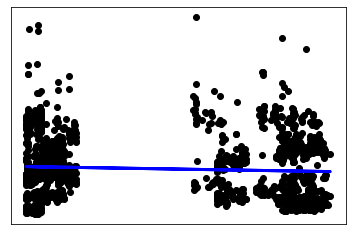

In [133]:
# Plot outputs
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()